# Penguin Species Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 0.7)
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, roc_curve, RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [4]:
data = pd.read_csv('Penguin.csv')
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie_Female,Biscoe,37.9,18.6,172.0,3150.0
1,Adelie_Female,Biscoe,37.8,18.3,174.0,3400.0
2,Adelie_Female,Torgersen,40.2,17.0,176.0,3450.0
3,Adelie_Female,Dream,33.1,16.1,178.0,2900.0
4,Adelie_Female,Dream,39.5,16.7,178.0,3250.0
...,...,...,...,...,...,...
339,Gentoo_Male,Biscoe,55.1,16.0,230.0,5850.0
340,Gentoo_Male,Biscoe,59.6,17.0,230.0,6050.0
341,Gentoo_Male,Biscoe,54.3,15.7,231.0,5650.0
342,Adelie_Female,Torgersen,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,341.000000
mean,43.921930,17.151170,200.915205,4201.612903
std,5.459584,1.974793,14.061714,803.128740
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          3
dtype: int64

In [7]:
col_process = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
for item in col_process:
    data[item].fillna(data[item].mean(),inplace=True)
print(data.iloc[151])
data

species              Adelie_Male
island                 Torgersen
culmen_length_mm            42.8
culmen_depth_mm             18.5
flipper_length_mm          195.0
body_mass_g          4201.612903
Name: 151, dtype: object


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie_Female,Biscoe,37.90000,18.60000,172.000000,3150.000000
1,Adelie_Female,Biscoe,37.80000,18.30000,174.000000,3400.000000
2,Adelie_Female,Torgersen,40.20000,17.00000,176.000000,3450.000000
3,Adelie_Female,Dream,33.10000,16.10000,178.000000,2900.000000
4,Adelie_Female,Dream,39.50000,16.70000,178.000000,3250.000000
...,...,...,...,...,...,...
339,Gentoo_Male,Biscoe,55.10000,16.00000,230.000000,5850.000000
340,Gentoo_Male,Biscoe,59.60000,17.00000,230.000000,6050.000000
341,Gentoo_Male,Biscoe,54.30000,15.70000,231.000000,5650.000000
342,Adelie_Female,Torgersen,43.92193,17.15117,200.915205,4201.612903


In [8]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [9]:
data['species'].value_counts()

Adelie_Female       79
Adelie_Male         73
Gentoo_Female       63
Gentoo_Male         61
Chinstrap_Female    34
Chinstrap_Male      34
Name: species, dtype: int64

# Data Analysis

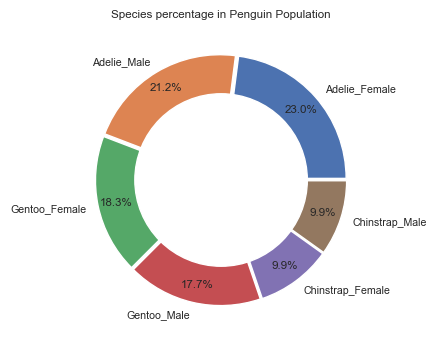

In [10]:
species_count = [79, 73, 63, 61, 34, 34]
species = ['Adelie_Female', 'Adelie_Male', 'Gentoo_Female', 'Gentoo_Male', 'Chinstrap_Female', 'Chinstrap_Male']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
plt.pie(species_count, labels=species, autopct='%1.1f%%', pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(4, 4, forward=True)
plt.title('Species percentage in Penguin Population')
plt.show()

In [11]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.612903
std,5.443643,1.969027,14.020657,799.608802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [12]:
df1 = data[data['species'] == 'Adelie_Female']
df2 = data[data['species'] == 'Adelie_Male']
df3 = data[data['species'] == 'Chinstrap_Female']
df4 = data[data['species'] == 'Chinstrap_Male']
df5 = data[data['species'] == 'Gentoo_Female']
df6 = data[data['species'] == 'Gentoo_Male']

In [13]:
label_encoder = preprocessing.LabelEncoder()
data['island'] = label_encoder.fit_transform(data['island'])  
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie_Female,0,37.90000,18.60000,172.000000,3150.000000
1,Adelie_Female,0,37.80000,18.30000,174.000000,3400.000000
2,Adelie_Female,2,40.20000,17.00000,176.000000,3450.000000
3,Adelie_Female,1,33.10000,16.10000,178.000000,2900.000000
4,Adelie_Female,1,39.50000,16.70000,178.000000,3250.000000
...,...,...,...,...,...,...
339,Gentoo_Male,0,55.10000,16.00000,230.000000,5850.000000
340,Gentoo_Male,0,59.60000,17.00000,230.000000,6050.000000
341,Gentoo_Male,0,54.30000,15.70000,231.000000,5650.000000
342,Adelie_Female,2,43.92193,17.15117,200.915205,4201.612903


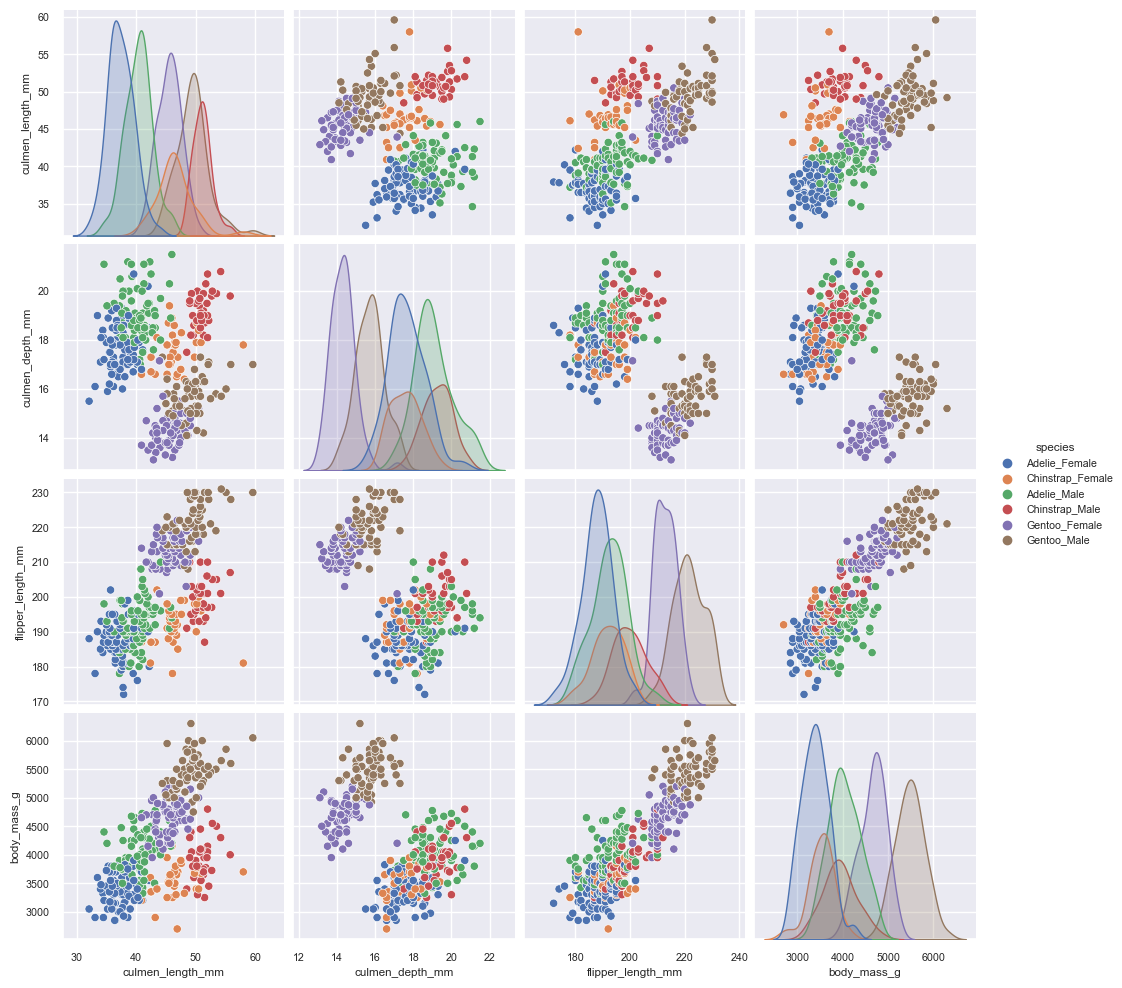

In [14]:
sns.pairplot(data.drop(['island'], axis = 1),hue='species')

Text(0.5, 1.0, 'Culmen length distribution')

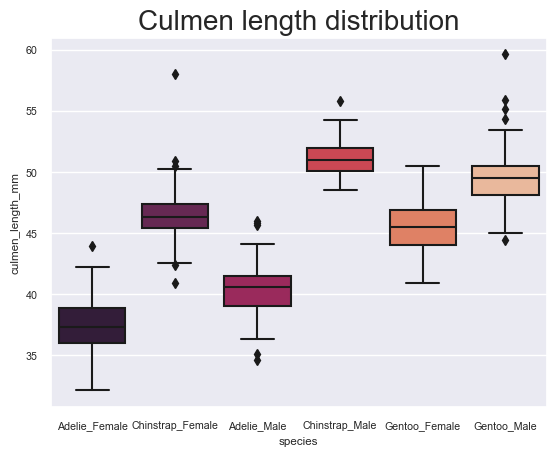

In [15]:
sns.boxplot(x=data.species,y=data.culmen_length_mm, palette='rocket')
plt.title("Culmen length distribution",fontsize=20)

Text(0.5, 1.0, 'Culmen depth distribution')

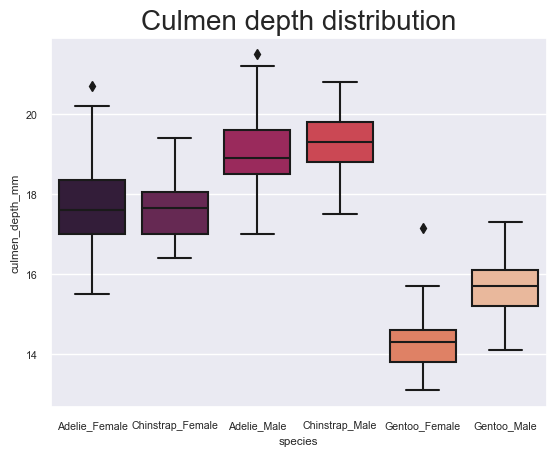

In [16]:
sns.boxplot(x=data.species,y=data.culmen_depth_mm, palette='rocket')
plt.title("Culmen depth distribution",fontsize=20)

Text(0.5, 1.0, 'Flipper length distribution')

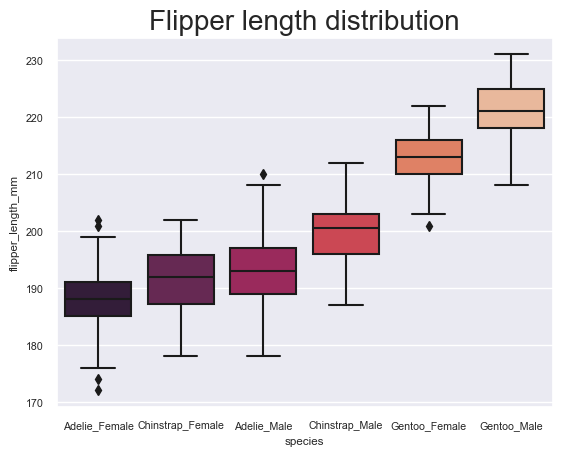

In [17]:
sns.boxplot(x=data.species,y=data.flipper_length_mm, palette = 'rocket')
plt.title("Flipper length distribution",fontsize=20)

Text(0.5, 1.0, 'Body mass distribution')

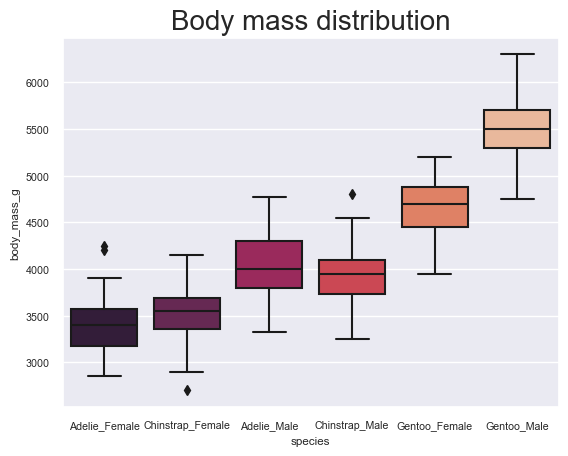

In [18]:
sns.boxplot(x=data.species,y=data.body_mass_g,palette='rocket')
plt.title("Body mass distribution",fontsize=20)

In [19]:
physical_features = data.iloc[:,2:]
physical_features

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,37.90000,18.60000,172.000000,3150.000000
1,37.80000,18.30000,174.000000,3400.000000
2,40.20000,17.00000,176.000000,3450.000000
3,33.10000,16.10000,178.000000,2900.000000
4,39.50000,16.70000,178.000000,3250.000000
...,...,...,...,...
339,55.10000,16.00000,230.000000,5850.000000
340,59.60000,17.00000,230.000000,6050.000000
341,54.30000,15.70000,231.000000,5650.000000
342,43.92193,17.15117,200.915205,4201.612903


                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595149        -0.472039           0.871281   

                   body_mass_g  
culmen_length_mm      0.595149  
culmen_depth_mm      -0.472039  
flipper_length_mm     0.871281  
body_mass_g           1.000000  


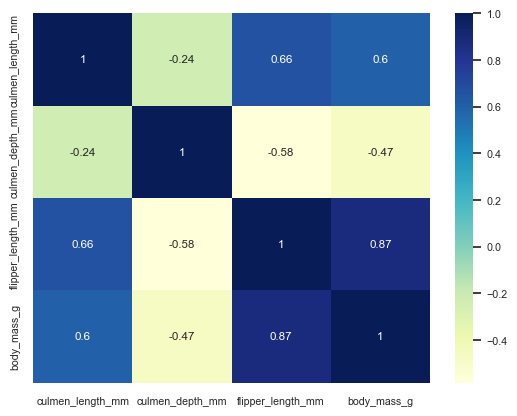

In [20]:
print(physical_features.corr())
dataplot = sns.heatmap(physical_features.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Logistic Regression

In [23]:
X = data[['island','culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['species']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.3, random_state = 1)

print('X_train dimension = ', X_train.shape)
print('X_test dimension = ', X_test.shape)
print('y_train dimension = ', y_train.shape)
print('y_train dimension = ', y_test.shape)

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train)
xtest = sc_x.transform(X_test)

X_train dimension =  (240, 5)
X_test dimension =  (104, 5)
y_train dimension =  (240,)
y_train dimension =  (104,)


In [389]:
lm = LogisticRegression(multi_class='multinomial', max_iter = 10000)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [390]:
pred = lm.predict(X_test)
print(X_train)
pred.shape

     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
288       0              49.3             15.7              217.0       5850.0
78        2              38.5             17.9              190.0       3325.0
232       0              45.5             13.9              210.0       4200.0
192       1              40.2             20.1              200.0       3975.0
325       0              50.5             15.9              225.0       5400.0
..      ...               ...              ...                ...          ...
203       2              41.4             18.5              202.0       3875.0
255       0              49.9             16.1              213.0       5400.0
72        2              35.7             17.0              189.0       3350.0
235       0              45.1             14.4              210.0       4400.0
37        1              39.0             18.7              185.0       3650.0

[240 rows x 5 columns]


(104,)

In [391]:
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[16  3  0  0  0  0]
 [ 5 23  0  0  0  0]
 [ 0  1  9  3  0  0]
 [ 0  0  1  8  0  0]
 [ 0  1  0  0 15  1]
 [ 0  0  0  0  3 15]]
0.8269230769230769


In [392]:
print(lm.coef_)
print()
print(lm.intercept_)

[[ 2.46848594e-01 -8.95052762e-01  9.17122274e-01  1.61828166e-01
  -1.84098419e-03]
 [ 3.77154696e-01 -7.83346912e-01  1.48356746e+00 -7.27596942e-03
   2.91063580e-03]
 [-8.18133926e-02  7.56010273e-01 -4.62031311e-01  1.00331740e-02
  -6.54091318e-03]
 [-1.63160399e-01  1.30299662e+00  2.09652141e-01 -2.59411042e-01
  -2.68170782e-03]
 [-2.18927807e-01 -1.54606488e-01 -1.77899636e+00  2.09231743e-01
  -1.12705194e-03]
 [-1.60101691e-01 -2.26000737e-01 -3.69314201e-01 -1.14406072e-01
   9.28002134e-03]]

[ 0.35893102 -0.23115312  0.12660622 -0.19973785  0.11815953 -0.1728058 ]


In [393]:
lm2 = LogisticRegression(multi_class='multinomial')
lm2.fit(xtrain, y_train)

LogisticRegression(multi_class='multinomial')

In [394]:
pred2 = lm2.predict(xtest)
print(xtrain)
pred2.shape

[[-0.90252138  1.02245461 -0.72365888  1.14299204  2.03539946]
 [ 1.89238353 -1.00264416  0.40628513 -0.79586242 -1.07390758]
 [-0.90252138  0.30991986 -1.64815853  0.64032607  0.00357506]
 ...
 [ 1.89238353 -1.52766977 -0.05596469 -0.86767184 -1.04312236]
 [-0.90252138  0.2349162  -1.39135307  0.64032607  0.2498568 ]
 [ 0.49493108 -0.90888959  0.81717386 -1.15490954 -0.67369974]]


(104,)

In [395]:
print(confusion_matrix(y_test, pred2))
print(accuracy_score(y_test, pred2))

[[19  0  0  0  0  0]
 [ 7 21  0  0  0  0]
 [ 2  1  7  3  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0 16  1]
 [ 0  0  0  0  1 17]]
0.8557692307692307


In [396]:
print(lm2.coef_)
print()
print(lm2.intercept_)

[[ 0.43447425 -3.01778465 -0.52002599 -0.74358646 -1.16050262]
 [ 0.37923242 -1.51829559  1.76690487 -0.54682379  1.14687474]
 [ 0.2312694   0.99470857 -0.64588592 -0.61706826 -1.74267148]
 [ 0.3161581   2.72930542  1.42316211 -0.0715807  -0.17636142]
 [-0.92354162  0.11782609 -2.40420111  0.50544804 -0.58968085]
 [-0.43759255  0.69424017  0.38004604  1.47361116  2.52234163]]

[ 0.05408549  1.08927659  0.66343856 -0.77672226  0.17966745 -1.20974583]


In [397]:
print('Logistic Regression Performance : \n')
print('Accuracy : {}'.format(accuracy_score(y_test, pred2)*100))
print('Recall : {}'.format(recall_score(y_test, pred2, average = 'macro')))
print('Precision : {}'.format(precision_score(y_test, pred2, average = 'macro')))
print('F1 Score : {}'.format(f1_score(y_test, pred2, average = 'macro')))

# print(classification_report(y_test, pred2))

Logistic Regression Performance : 

Accuracy : 85.57692307692307
Recall : 0.8623470755823698
Precision : 0.8781229663582605
F1 Score : 0.8485457350789015


In [398]:
rs_x = RobustScaler()
xtrain_rs = rs_x.fit_transform(X_train)
xtest_rs = rs_x.transform(X_test)

In [399]:
lm3 = LogisticRegression(multi_class='multinomial', max_iter = 10000)
lm3.fit(xtrain_rs, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [400]:
pred_rs = lm3.predict(xtest_rs)
print(xtrain_rs)
pred_rs.shape

[[-1.          0.59821121 -0.51239669  0.83333333  1.39047619]
 [ 1.         -0.61187282  0.21487603 -0.29166667 -0.53333333]
 [-1.          0.17244091 -1.10743802  0.54166667  0.13333333]
 ...
 [ 1.         -0.92559831 -0.08264463 -0.33333333 -0.51428571]
 [-1.          0.12762298 -0.94214876  0.54166667  0.28571429]
 [ 0.         -0.55585041  0.47933884 -0.5        -0.28571429]]


(104,)

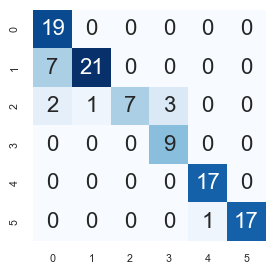

In [401]:
fig, ax = plt.subplots(figsize=(3,3))   
sns.heatmap(confusion_matrix(y_test,pred_rs),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 16});

In [402]:
print('Logistic Regression Performance after Robust Scaling : \n')
print('Accuracy : {}'.format(accuracy_score(y_test, pred_rs)*100))
print('Recall : {}'.format(recall_score(y_test, pred_rs, average = 'macro')))
print('Precision : {}'.format(precision_score(y_test, pred_rs, average = 'macro')))
print('F1 Score : {}'.format(f1_score(y_test, pred_rs, average = 'macro')))

Logistic Regression Performance after Robust Scaling : 

Accuracy : 86.53846153846155
Recall : 0.8721509971509972
Precision : 0.8879268879268879
F1 Score : 0.8580851063829787


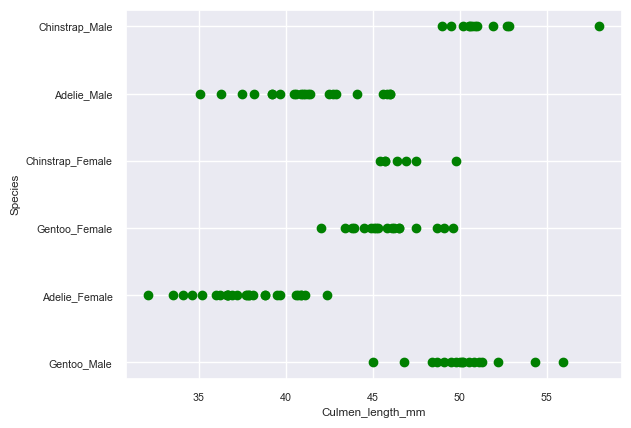

In [403]:
xtest_rs_plot = X_test
plt.scatter(xtest_rs_plot.iloc[:, 1], pred_rs, color = 'green')
plt.xlabel('Culmen_length_mm')
plt.ylabel('Species')
plt.show()

In [404]:
print(lm3.coef_)
print()
print(lm3.intercept_)

[[ 5.20773307e-01 -3.57952638e+00 -6.55707943e-01 -1.00395367e+00
  -1.61812706e+00]
 [ 4.89228696e-01 -1.82841739e+00  2.29805219e+00 -5.67117678e-01
   1.40975279e+00]
 [ 3.97445227e-01  1.25916306e+00 -7.34174070e-01 -9.08910102e-01
  -1.97281521e+00]
 [ 4.67243017e-01  3.12500694e+00  1.81057556e+00  7.43468501e-02
  -2.50925720e-01]
 [-1.12681959e+00 -3.54040959e-03 -3.03962371e+00  6.04260179e-01
  -4.81547203e-01]
 [-7.47870655e-01  1.02731418e+00  3.20877974e-01  1.80137442e+00
   2.91366241e+00]]

[ 0.61643869  0.97301349  0.90673401 -0.19660309 -0.53401669 -1.76556641]


In [405]:
data['species'] = label_encoder.fit_transform(data['species']) 
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,0,37.90000,18.60000,172.000000,3150.000000
1,0,0,37.80000,18.30000,174.000000,3400.000000
2,0,2,40.20000,17.00000,176.000000,3450.000000
3,0,1,33.10000,16.10000,178.000000,2900.000000
4,0,1,39.50000,16.70000,178.000000,3250.000000
...,...,...,...,...,...,...
339,5,0,55.10000,16.00000,230.000000,5850.000000
340,5,0,59.60000,17.00000,230.000000,6050.000000
341,5,0,54.30000,15.70000,231.000000,5650.000000
342,0,2,43.92193,17.15117,200.915205,4201.612903


# Multiple Linear Regression

In [406]:
data2 = data
data2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,0,37.90000,18.60000,172.000000,3150.000000
1,0,0,37.80000,18.30000,174.000000,3400.000000
2,0,2,40.20000,17.00000,176.000000,3450.000000
3,0,1,33.10000,16.10000,178.000000,2900.000000
4,0,1,39.50000,16.70000,178.000000,3250.000000
...,...,...,...,...,...,...
339,5,0,55.10000,16.00000,230.000000,5850.000000
340,5,0,59.60000,17.00000,230.000000,6050.000000
341,5,0,54.30000,15.70000,231.000000,5650.000000
342,0,2,43.92193,17.15117,200.915205,4201.612903


[[-0.22248668  0.14522014 -0.21010298  0.03138105  0.00050963]]
[-8.74798384]


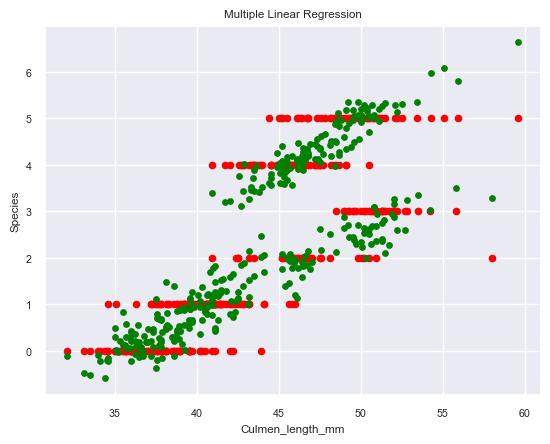

Accuracy : 68.02325581395348


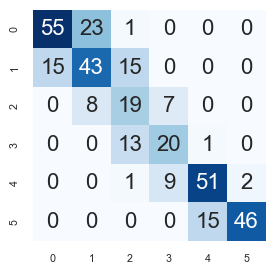

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

features_reg = data2[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
target_reg = data2['species']

# features_reg = np.array(features_reg).reshape(-1,5)
target_reg = np.array(target_reg).reshape(-1,1)

model = LinearRegression()
model.fit(features_reg, target_reg)

pred = model.predict(features_reg)
print(model.coef_)
print(model.intercept_)

plt.scatter(features_reg.iloc[:,1] ,target_reg, color = 'red', s = 20)
plt.scatter(features_reg.iloc[:,1] , model.predict(features_reg), color = 'green', s = 15)
plt.title('Multiple Linear Regression')
plt.xlabel('Culmen_length_mm')
plt.ylabel('Species')
plt.show()

res = []
for i in np.round(model.predict(features_reg)):
    if i[0] < 0.5 : res.append([0])
    elif i[0] > 5.0: res.append([5])
    else : res.append([i[0]])

print('Accuracy : {}'.format(accuracy_score(target_reg, res)*100))
fig, ax = plt.subplots(figsize=(3,3))   
sns.heatmap(confusion_matrix(target_reg,res),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 16});

In [431]:
print('Linear Regression Performance : \n')
print('Accuracy : {}'.format(accuracy_score(target_reg,res)*100))
print('Recall : {}'.format(recall_score(target_reg,res, average = 'macro')))
print('Precision : {}'.format(precision_score(target_reg,res, average = 'macro')))
print('F1 Score : {}'.format(f1_score(target_reg,res, average = 'macro')))

Linear Regression Performance : 

Accuracy : 68.02325581395348
Recall : 0.6659874368741566
Precision : 0.6716055645959697
F1 Score : 0.6635335042925593


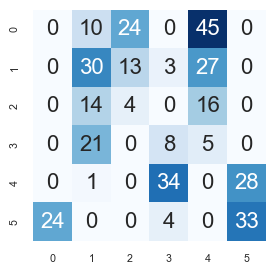

In [433]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

kmeans = KMeans(6,init='k-means++')
kmeans.fit(data[['culmen_depth_mm', 'flipper_length_mm']])
fig, ax = plt.subplots(figsize=(3,3))   
sns.heatmap(confusion_matrix(data.species,kmeans.labels_),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 16});

# Kmeans Clustering

In [434]:
print('Linear Regression Performance : \n')
print('Accuracy : {}'.format(accuracy_score(data.species,kmeans.labels_)*100))
print('Recall : {}'.format(recall_score(data.species,kmeans.labels_, average = 'macro')))
print('Precision : {}'.format(precision_score(data.species,kmeans.labels_, average = 'macro')))
print('F1 Score : {}'.format(f1_score(data.species,kmeans.labels_, average = 'macro')))

Linear Regression Performance : 

Accuracy : 21.802325581395348
Recall : 0.2174806145229257
Precision : 0.19942445506580753
F1 Score : 0.20718432021996372


In [435]:
print(classification_report(data.species,kmeans.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.39      0.41      0.40        73
           2       0.10      0.12      0.11        34
           3       0.16      0.24      0.19        34
           4       0.00      0.00      0.00        63
           5       0.54      0.54      0.54        61

    accuracy                           0.22       344
   macro avg       0.20      0.22      0.21       344
weighted avg       0.21      0.22      0.21       344



In [436]:
f"Accuracy is {np.round(100*accuracy_score(data.species,kmeans.labels_),2)}"

'Accuracy is 21.8'

In [411]:
from sklearn.cluster import DBSCAN

X_train_db = data[['culmen_length_mm', 'culmen_depth_mm']]
clustering = DBSCAN(eps=10, min_samples=7).fit(X_train_db)
DBSCAN_dataset = X_train_db.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_

In [412]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
0,344


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_rs, pos_label=0)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()